In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from scipy.spatial import Voronoi, voronoi_plot_2d

In [2]:
# (a) Load the given dataset into your program.

data = pd.read_csv('toydata.csv')
data

,Feature1,Feature2,Label
0,0.559426,2.388694,0
1,1.312175,-0.717315,1
2,-1.559849,-1.924874,0
3,-2.281386,-0.136856,0
4,1.560704,-0.427958,1
...,...,...,...
95,1.804741,-0.149941,1
96,1.154661,-0.955482,1
97,-0.567725,1.389918,0
98,-1.158068,0.865620,0


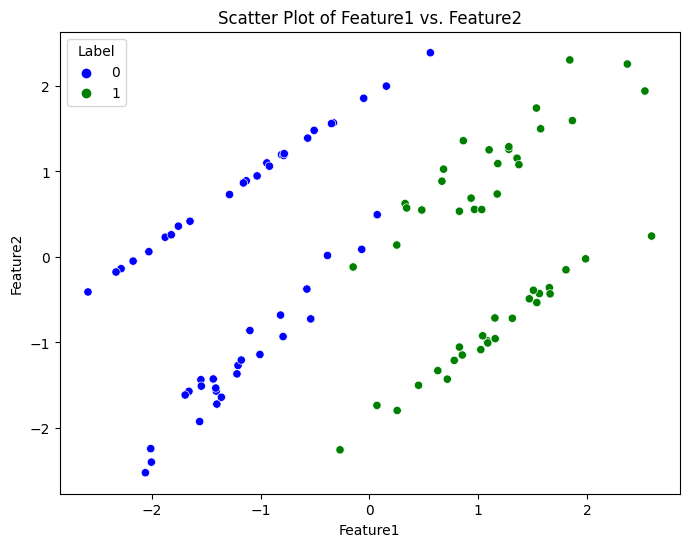

In [9]:
# Visualize the dataset using a scatter plot, distinguishing data points by color (e.g., blue gree)
# according to their class label.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=data, palette={0: 'blue', 1: 'green'})
plt.title('Scatter Plot of Feature1 vs. Feature2')
plt.show()
                                                                                 
                                                                                 

In [11]:
#(c) Exhibit the first few rows of the dataset

print(data.head())

   Feature1  Feature2  Label
0  0.559426  2.388694      0
1  1.312175 -0.717315      1
2 -1.559849 -1.924874      0
3 -2.281386 -0.136856      0
4  1.560704 -0.427958      1


In [12]:
# d) Present basic statistics of the descriptive features within the dataset.

print(data.describe())

         Feature1    Feature2       Label
count  100.000000  100.000000  100.000000
mean    -0.027714   -0.048848    0.500000
std      1.323957    1.230126    0.502519
min     -2.585909   -2.523434    0.000000
25%     -1.185113   -1.097573    0.000000
50%      0.069846   -0.035241    0.500000
75%      1.089659    1.035708    1.000000
max      2.591239    2.388694    1.000000


In [15]:
# (e) Apply the holdout method to split the data, allocating 20% for testing and the remaining 80% for
# training. Ensure consistent splitting of data every time code executes by using '42' as 
# the random seed value in Python.


random_seed = 42


X = data.drop('Label', axis=1) #selecting features 1 & 2
y = data['Label'] #selecting Label or the target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)


In [21]:
#performing Z-score normalization
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Display the shapes of the resulting datasets
print("Shape of X_train: ", X_train_standardized.shape) 
print("Shape of X_test: ", X_test_standardized.shape)

Shape of X_train:  (80, 2)
Shape of X_test:  (20, 2)


In [25]:
# (g) Employ the k-Nearest Neighbor (k=1) classifier to predict the class label of test instances. 
# Notice that the k-NN classifier does not have a training stage.


knn_classifier = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier (k-NN does not have a training stage, it simply memorizes the data)
# We pass the standardized training data and the corresponding labels
knn_classifier.fit(X_train_standardized, y_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
# Predict the class labels for the test instances
predicted_labels = knn_classifier.predict(X_test_standardized)

# Display test instances alongside their predicted and true classes
print("Test Instances and Predicted Classes:")
for i in range(len(X_test_standardized)):
    instance = X_test_standardized[i]  # Access instance directly from the numpy array
    true_label = y_test.iloc[i]  # Access true label from the pandas Series
    predicted_label = predicted_labels[i]
    print(f"Instance: {instance}, True Label: {true_label}, Predicted Label: {predicted_label}")


Test Instances and Predicted Classes:
Instance: [-1.53760567 -2.1124287 ], True Label: 0, Predicted Label: 0
Instance: [0.93499408 1.15684075], True Label: 1, Predicted Label: 1
Instance: [1.31236746 1.37728929], True Label: 1, Predicted Label: 1
Instance: [-1.05830003 -1.50477316], True Label: 0, Predicted Label: 0
Instance: [ 0.92208855 -0.84200062], True Label: 1, Predicted Label: 1
Instance: [-0.24818911  0.05079891], True Label: 0, Predicted Label: 1
Instance: [-1.06599765 -1.33703729], True Label: 0, Predicted Label: 0
Instance: [-1.17176274 -1.31658821], True Label: 0, Predicted Label: 0
Instance: [2.12444694 0.25442611], True Label: 1, Predicted Label: 1
Instance: [0.50506397 2.17346468], True Label: 0, Predicted Label: 0
Instance: [ 1.25929887 -0.31298937], True Label: 1, Predicted Label: 1
Instance: [0.01679368 1.69670672], True Label: 0, Predicted Label: 0
Instance: [1.52562731 2.09810435], True Label: 1, Predicted Label: 1
Instance: [-1.26249753 -1.37104849], True Label: 0,

In [33]:
# (i) Create a confusion matrix for the test data predictions.


conf_matrix = confusion_matrix(y_test, predicted_labels)


In [35]:
# (j) Display TP, TN, FP and FN values like the following:

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Display TP, TN, FP, FN values
print("The True Positive (TP) value is:", TP)
print("The True Negative (TN) value is:", TN)
print("The False Positive (FP) value is:", FP)
print("The False Negative (FN) value is:", FN)

# Display the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

The True Positive (TP) value is: 9
The True Negative (TN) value is: 10
The False Positive (FP) value is: 1
The False Negative (FN) value is: 0

Confusion Matrix:
[[10  1]
 [ 0  9]]


In [36]:
# (k) Calculate various model performance metrics such as Accuracy, Misclassification Rate, Precision,
# Recall and F1 score utilizing the TP, TN, FP and FN values. 


# Calculate performance metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
misclassification_rate = (FP + FN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the performance measure values
print("Accuracy =", "{:.2%}".format(accuracy))
print("Misclassification Rate =", "{:.2%}".format(misclassification_rate))
print("Precision =", "{:.2%}".format(precision))
print("Recall =", "{:.2%}".format(recall))
print("F1 Score =", "{:.2%}".format(f1_score))


Accuracy = 95.00%
Misclassification Rate = 5.00%
Precision = 90.00%
Recall = 100.00%
F1 Score = 94.74%


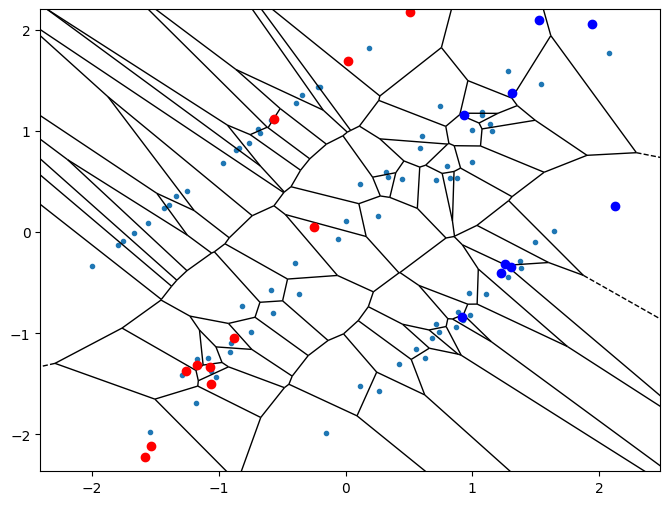

In [56]:
# (l) Generate a Voronoi diagram for the training data


vor = Voronoi(X_train_standardized)

# Plot the Voronoi diagram
fig, ax = plt.subplots(figsize=(8, 6))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black', line_width=1)

# Plot the test data points
plt.plot(X_test_standardized[y_test == 0][:, 0], X_test_standardized[y_test == 0][:, 1], 'ro', label='Test Class 0')
plt.plot(X_test_standardized[y_test == 1][:, 0], X_test_standardized[y_test == 1][:, 1], 'bo', label='Test Class 1')



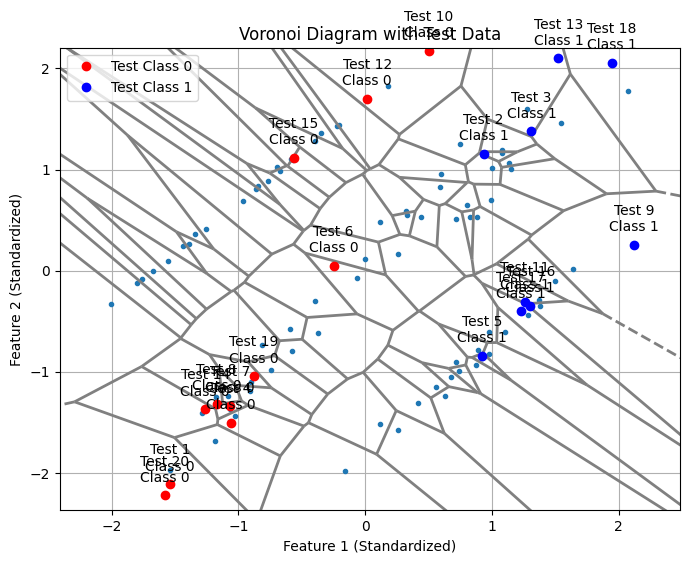

In [57]:
# (m) Place the test data points, annotated with their class label, on the Vornoi diagram.


vor = Voronoi(X_train_standardized)


fig, ax = plt.subplots(figsize=(8, 6))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='gray', line_width=2)


ax.plot(X_test_standardized[y_test == 0][:, 0], X_test_standardized[y_test == 0][:, 1], 'ro', label='Test Class 0')
ax.plot(X_test_standardized[y_test == 1][:, 0], X_test_standardized[y_test == 1][:, 1], 'bo', label='Test Class 1')
# Annotate test data points with their class label
for i in range(len(X_test_standardized)):
    ax.annotate(f'Test {i+1}\nClass {int(y_test.iloc[i])}',
                 (X_test_standardized[i, 0], X_test_standardized[i, 1]),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center')

ax.set_xlabel('Feature 1 (Standardized)')
ax.set_ylabel('Feature 2 (Standardized)')
ax.set_title('Voronoi Diagram with Test Data')
ax.legend()
plt.grid(True)
plt.show()
